Fonte dos dados: https://www.kaggle.com/macedojleo/campeonato-brasileiro-2003-a-2019

In [145]:
# load libraries
import pandas as pd

In [455]:
# load dataset
df = pd.read_csv('novo_campeonato_brasileiro.csv')
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN


In [456]:
# Cria coluna com clube vencedor
def clube_vencedor(row):
    if row['Vencedor']=='Mandante':
        return row['Equipe_mandante']
    if row['Vencedor']=='Visitante':
        return row['Equipe_visitante']
    else:
        return 'Empate'
    
df['Clube_Vencedor'] = df.apply(clube_vencedor, axis=1)
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS,Clube_Vencedor
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN,Guarani
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN,Athletico-PR
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN,Empate
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN,Empate
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN,Empate


In [458]:
# Cria coluna com clube derrotado
def clube_derrotado(row):
    if row['Vencedor']=='Mandante':
        return row['Equipe_visitante']
    if row['Vencedor']=='Visitante':
        return row['Equipe_mandante']
    else:
        return 'Empate'
    
df['Clube_Derrotado'] = df.apply(clube_derrotado, axis=1)
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS,Clube_Vencedor,Clube_Derrotado
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN,Guarani,Vasco
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN,Athletico-PR,Grêmio
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN,Empate,Empate
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN,Empate,Empate
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN,Empate,Empate


In [460]:
# cria coluna de gols do vencedor e derrotado (usaremos para calcular saldo de gols dos times)
def gols_vencedor(row):
    if row['Vencedor']=='Mandante':
        return row['Gols_mandante']
    if row['Vencedor']=='Visitante':
        return row['Gols_visitante']
    
df['gols_vencedor'] = df.apply(gols_vencedor, axis=1)

def gols_derrotado(row):
    if row['Vencedor']=='Mandante':
        return row['Gols_visitante']
    if row['Vencedor']=='Visitante':
        return row['Gols_mandante']
    
df['gols_derrotado'] = df.apply(gols_derrotado, axis=1)

def gols_empate(row):
    if row['Vencedor']=='Empate':
        return row['Gols_mandante']
    
df['gols_empate'] = df.apply(gols_empate, axis=1)

df['dif_gols'] = df['gols_vencedor']-df['gols_derrotado']
df['total_gols'] = df['Gols_mandante']+df['Gols_visitante']

df.head(10)

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS,Clube_Vencedor,Clube_Derrotado,gols_vencedor,gols_derrotado,gols_empate,dif_gols,total_gols
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN,Guarani,Vasco,4.0,2.0,NaN,2.0,6
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN,Athletico-PR,Grêmio,2.0,0.0,NaN,2.0,2
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN,Empate,Empate,NaN,NaN,2.0,NaN,4
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2
5,2003.01.0006,30/03/2003,2003,1,Criciúma,Fluminense,2,0,SC,RJ,Mandante,Heriberto Hulse,NaN,Criciúma,Fluminense,2.0,0.0,NaN,2.0,2
6,2003.01.0007,30/03/2003,2003,1,Juventude,São Paulo,2,2,RS,SP,Empate,Alfredo Jaconi,NaN,Empate,Empate,NaN,NaN,2.0,NaN,4
7,2003.01.0008,30/03/2003,2003,1,Fortaleza,Bahia,0,0,CE,BH,Empate,Castelão,NaN,Empate,Empate,NaN,NaN,0.0,NaN,0
8,2003.01.0009,30/03/2003,2003,1,Cruzeiro,São Caetano,2,2,MG,SP,Empate,Mineirão,NaN,Empate,Empate,NaN,NaN,2.0,NaN,4
9,2003.01.0010,30/03/2003,2003,1,Vitória,Figueirense,1,1,ES,SC,Empate,Barradão,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2


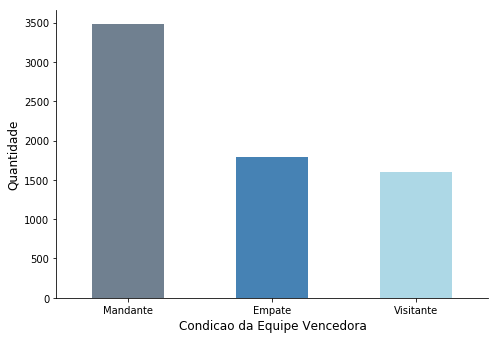

In [445]:
# Jogar em casa tem correlação com a vitória?
import matplotlib.pyplot as plt
import pandas, numpy as np

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

# Escolhi uma paleta qualquer porque nao sei escolher cor 
# cmap = plt.get_cmap('tab10')
# https://matplotlib.org/tutorials/colors/colormaps.html
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# cores = np.random.rand(3)

#colors = [cmap(i) for i in np.linspace(.10, .75, 3)] #(cores[0],cores[1],cores[2])]

df['Vencedor'].value_counts().plot(kind='bar', color=['slategray','steelblue', 'lightblue'], width=.5, rot=0);

ax.set_xlabel('Condicao da Equipe Vencedora', fontsize=12);
ax.set_ylabel('Quantidade', fontsize=12);
#ax.set_title('Condicao do Vencedor', fontsize=18);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# adicionando os valores no gráfico
#y = df.groupby('Vencedor')['ID'].count().sort_values(ascending=False)

#for i in range(len(y)):
#    ax.text(0+2*.5, y[i],str(y[i]), color='blue', fontweight='bold')

In [577]:
df[['Gols_mandante','Gols_visitante']].describe()

,Gols_mandante,Gols_visitante
count,6886.000000,6886.000000
mean,1.577694,1.029335
std,1.247215,1.030689
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


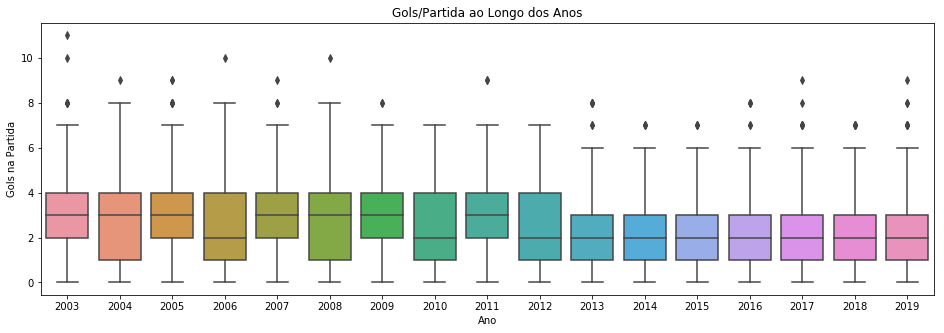

In [468]:
# Como variou a quantidade de gols por partida ao longo dos anos?
import seaborn as sns
plt.figure(figsize=(16,5))
sns.boxplot(x="Ano", y="total_gols",data=df).set(
    xlabel='Ano', 
    ylabel='Gols na Partida',
    title = 'Gols/Partida ao Longo dos Anos');

In [356]:
# qual clube tem mais vitórias na história dos pontos corridos? (top10)
df['Clube_Vencedor'].value_counts()[1:10]

São Paulo        309
Cruzeiro         293
Santos           291
Flamengo         275
Internacional    272
Grêmio           269
Corinthians      268
Fluminense       252
Athletico-PR     251
Name: Clube_Vencedor, dtype: int64

In [478]:
# qual clube tem mais derrotas? (Precisa ainda checar proporcionalmente)
df['Clube_Derrotado'].value_counts()[1:10]

Fluminense      235
Athletico-PR    228
Cruzeiro        222
Atlético-MG     217
Botafogo-RJ     213
Santos          205
Flamengo        203
Vasco           200
Grêmio          199
Name: Clube_Derrotado, dtype: int64

In [600]:
# E nos últimos 10 anos?
df[df['Ano']>2009]['Clube_Derrotado'].value_counts()[1:10]

Fluminense      133
Botafogo-RJ     127
Atlético-MG     126
Cruzeiro        124
Athletico-PR    121
Santos          118
São Paulo       116
Palmeiras       108
Flamengo        108
Name: Clube_Derrotado, dtype: int64

In [480]:
#RASCUNHO
#df_gols=df.groupby(['Ano'])["Gols_mandante", "Gols_visitante"].apply(lambda x : x.astype(int).sum())
#df_gols['Total'] = df_gols['Gols_mandante']+df_gols['Gols_visitante']
#df_gols['Total'].plot()

In [481]:
# Quantidade de partidas por ano
# 2005 teve 22 clubes se enfrentando, 21 rodadas, 11 jogos por rodada, 462 jogos
# isso significa que excluíram as rodadas anuladas pela cpi da arbitragem
df.groupby('Ano')['Rodada'].count()

Ano
2003    552
2004    552
2005    462
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
Name: Rodada, dtype: int64

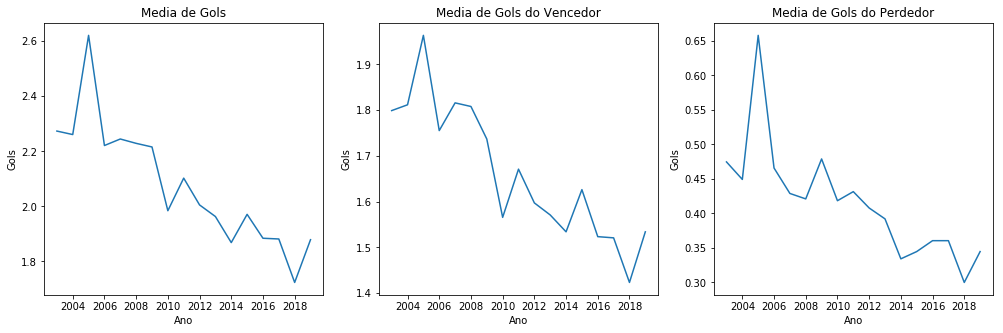

In [482]:
# Como evoluiu a media de gols?
df_gols = df.groupby(['Ano']).agg({'gols_vencedor':'sum','gols_derrotado':'sum','Data':'count','dif_gols':'mean'})
df_gols['media_gols']= (df_gols['gols_vencedor']+df_gols['gols_derrotado'])/df_gols['Data']
df_gols['media_vencedor']= df_gols['gols_vencedor']/df_gols['Data']
df_gols['media_perdedor']= df_gols['gols_derrotado']/df_gols['Data']

plt.figure(figsize=(17,5))
plt.subplot(131)
plt.plot(df_gols['media_gols'])
plt.title('Media de Gols')
plt.xlabel('Ano')
plt.ylabel('Gols')

plt.subplot(132)
plt.plot(df_gols['media_vencedor'])
plt.title('Media de Gols do Vencedor')
plt.xlabel('Ano')
plt.ylabel('Gols')

plt.subplot(133)
plt.plot(df_gols['media_perdedor'])
plt.title('Media de Gols do Perdedor')
plt.xlabel('Ano')
plt.ylabel('Gols');

#df_gols

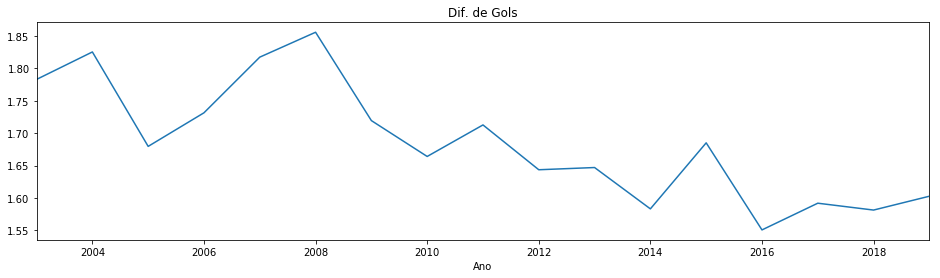

In [570]:
import seaborn as sns

plt.figure(figsize=(16,4))
#sns.boxplot(x='Ano', y='dif_gols', data=df)

#df[['total_gols','dif_gols', 'gols_vencedor', 'gols_derrotado']].describe()
plt.title('Dif. de Gols')
df.groupby('Ano')['dif_gols'].mean().plot(kind='line'); #evolucao da diferenca de gols ao longo do tempo

#df_teste.plot(x='Ano', y='dif_gols', data=df_teste, kind='bar')
#plt.plot(x='Ano', y='dif_gols', data=df_testeplt.plot(x='Ano', y='dif_gols', data=df_teste')
df.groupby(')

Vencedor,Empate,Mandante,Visitante,% Empate
Ano,,,,
2003,142,297,113,25.724638
2004,140,288,124,25.362319
2005,103,235,124,22.294372
2006,97,191,92,25.526316
2007,90,192,98,23.684211
2008,96,208,76,25.263158
2009,102,195,83,26.842105
2010,118,179,83,31.052632
2011,105,184,91,27.631579


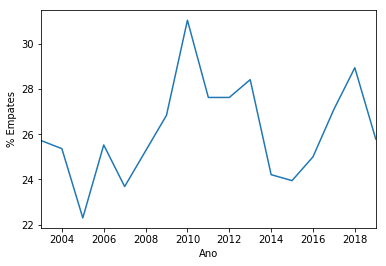

In [598]:
df_result = pd.crosstab(df['Ano'],df['Vencedor'])
df_result['% Empate']= df_result['Empate']/(df_result['Empate']+df_result['Mandante']+df_result['Visitante'])*100
df_result['% Empate'].plot();
plt.ylabel('% Empates');
df_result

In [589]:
# Temos mais empates?
# % de empates por ano
#df.groupby(['Ano', 'Vencedor']).size()

#(df['Vencedor'].eq('Empate').groupby(df['Ano']).sum()
#.div(df.groupby('Ano').size(),axis=0).mul(100).astype(str).add('%'))

c = pd.crosstab(df['Ano'],df['Vencedor'])
c.loc[:,'Event_B'].div(c.sum(1),axis=0).mul(100).astype(str).add('%')

Ano
2003    25.724637681159418%
2004     25.36231884057971%
2005    22.294372294372295%
2006    25.526315789473685%
2007    23.684210526315788%
2008    25.263157894736842%
2009    26.842105263157894%
2010     31.05263157894737%
2011    27.631578947368425%
2012    27.631578947368425%
2013    28.421052631578945%
2014    24.210526315789473%
2015     23.94736842105263%
2016                  25.0%
2017    27.105263157894736%
2018    28.947368421052634%
2019    25.789473684210527%
dtype: object

In [483]:
# Montando a base na visão clube
clubes_vencedores = pd.DataFrame({'Clubes':df.groupby('Clube_Vencedor')['gols_vencedor'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Vencedor')['gols_vencedor'].sum().sort_values(ascending=False)})
clubes_derrotados = pd.DataFrame({'Clubes':df.groupby('Clube_Derrotado')['gols_derrotado'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Derrotado')['gols_derrotado'].sum().sort_values(ascending=False)})

df_clubes = pd.concat([clubes_vencedores, clubes_derrotados]).groupby(["Clubes"], as_index=False)["Gols"].sum().sort_values(by='Gols',ascending=False).reset_index()
df_clubes = df_clubes[['Clubes','Gols']]


In [484]:
# Como lidar com os gols de empate?

def clube_vencedor_empate(row): # vencedor recebe o mandante
    if row['Vencedor']=='Empate':
        return row['Equipe_mandante']
    
def clube_derrotado_empate(row): # vencedor recebe o mandante
    if row['Vencedor']=='Empate':
        return row['Equipe_visitante']
    
df['Clube_Empate_Mandante'] = df.apply(clube_vencedor_empate, axis=1)
df['Clube_Empate_Visitante'] = df.apply(clube_derrotado_empate, axis=1)

df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,...,OBS,Clube_Vencedor,Clube_Derrotado,gols_vencedor,gols_derrotado,gols_empate,dif_gols,total_gols,Clube_Empate_Mandante,Clube_Empate_Visitante
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,...,NaN,Guarani,Vasco,4.0,2.0,NaN,2.0,6,None,None
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,...,NaN,Athletico-PR,Grêmio,2.0,0.0,NaN,2.0,2,None,None
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,...,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2,Flamengo,Coritiba
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,...,NaN,Empate,Empate,NaN,NaN,2.0,NaN,4,Goiás,Paysandu
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,...,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2,Internacional,Ponte Preta


In [506]:
# agora criamos os campos dos gols 
# Melhor que o que foi sugerido antes: dá pra criar só atribuindo os gols do mandante e visitante 
# para o campo gols_vencedor_empate e gols_derrotado_empate
df.loc[df['Vencedor'] == 'Empate', 'gols_empate_mandante'] = df['Gols_mandante']
df.loc[df['Vencedor'] == 'Empate', 'gols_empate_visitante'] = df['Gols_mandante']

df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,...,Clube_Derrotado,gols_vencedor,gols_derrotado,gols_empate,dif_gols,total_gols,Clube_Empate_Mandante,Clube_Empate_Visitante,gols_empate_mandante,gols_empate_visitante
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,...,Vasco,4.0,2.0,NaN,2.0,6,None,None,NaN,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,...,Grêmio,2.0,0.0,NaN,2.0,2,None,None,NaN,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,...,Empate,NaN,NaN,1.0,NaN,2,Flamengo,Coritiba,1.0,1.0
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,...,Empate,NaN,NaN,2.0,NaN,4,Goiás,Paysandu,2.0,2.0
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,...,Empate,NaN,NaN,1.0,NaN,2,Internacional,Ponte Preta,1.0,1.0


In [517]:
clubes_empates_mandantes = pd.DataFrame({'Clubes':df.groupby('Clube_Empate_Mandante')['gols_empate_mandante'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Empate_Mandante')['gols_empate_mandante'].sum().sort_values(ascending=False)})
clubes_empates_visitantes = pd.DataFrame({'Clubes':df.groupby('Clube_Empate_Visitante')['gols_empate_visitante'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Empate_Visitante')['gols_empate_visitante'].sum().sort_values(ascending=False)})

clubes_empates_mandantes=clubes_empates_mandantes.reset_index().drop(columns='Clube_Empate_Mandante')
clubes_empates_visitantes=clubes_empates_visitantes.reset_index().drop(columns='Clube_Empate_Visitante')


,Clubes,Gols
0,Flamengo,107.0
1,Atlético-MG,101.0
2,Fluminense,95.0
3,Corinthians,89.0
4,Santos,87.0


In [525]:
# Agora joins mais uma vez com os groupby
# traz os gols de quando clube empatou sendo mandante

df_clubes_2 = pd.concat([df_clubes, clubes_empates_mandantes]).groupby(["Clubes"], 
                                                              as_index=False)["Gols"].sum().sort_values(by='Gols',ascending=False).reset_index()


df_clubes_2 = pd.concat([df_clubes_2, clubes_empates_visitantes]).groupby(["Clubes"], 
                                                              as_index=False)["Gols"].sum().sort_values(by='Gols',ascending=False).reset_index()

df_clubes_2 = df_clubes_2[['Clubes','Gols']]

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [540]:
# E gols por jogo?
# Vamos trazer o numero de jogos
clubes_jogos = pd.DataFrame({'Clubes':df.groupby('Equipe_mandante')['Equipe_mandante'].count().sort_values(ascending=False).index,
                                 'Jogos':df.groupby('Equipe_mandante')['Equipe_mandante'].count().sort_values(ascending=False)})

clubes_jogos['total_jogos']= clubes_jogos['Jogos']*2

In [608]:
# agora trazemos o numero de jogos para nossa base na visao clube
df_clubes_3 = pd.merge(df_clubes_2,
         clubes_jogos[['Clubes','total_jogos']],
         on='Clubes',
         how='left')

df_clubes_3['media_gols'] = df_clubes_3['Gols']/df_clubes_3['total_jogos']
df_clubes_3[df_clubes_3['total_jogos']>300].sort_values(by='media_gols', ascending=False)
df_clubes_3[df_clubes_3['total_jogos']>300].sort_values(by='Gols', ascending=False)

,Clubes,Gols,total_jogos,media_gols
0,Santos,1008.0,666.0,1.513514
1,Cruzeiro,978.0,666.0,1.468468
2,São Paulo,978.0,666.0,1.468468
3,Flamengo,916.0,664.0,1.379518
4,Atlético-MG,903.0,628.0,1.437898
5,Fluminense,891.0,666.0,1.337838
6,Grêmio,859.0,624.0,1.376603
7,Athletico-PR,855.0,628.0,1.361465
8,Palmeiras,838.0,582.0,1.439863
9,Internacional,833.0,628.0,1.326433


Pendências:
- Criar uma visão clube + ano;
- Ver % de jogos vitoriosos/derrotado;
- Trazer gols sofridos